# **Model Development - Bhopal Data - 1 Day**
by: Argish Abhangi

`Model info:` **15 Days** Prior data input ➡ lstm_model ➡ **1 day** ahead prediction output

Model - `MPIMO LSTM` (Multiple Parallel Input & Multiple Output) <br>
Trainig Metrics used - `MSE` <br> 
Optimizer used - `Adam` 


#### Importing Libraries

In [98]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [99]:
# Load the new datasets for Bhopal city
train_data_path = '../data/train_bhopal_final.csv'
test_data_path = '../data/test_bhopal_final.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
0,2015-04-01,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,0.009535,301.828791,...,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,-112.673746
1,2015-04-02,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,0.011490,302.765242,...,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,-111.269587
2,2015-04-03,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,0.012793,303.068777,...,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,-106.525412
3,2015-04-04,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,0.014474,302.893081,...,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,-90.917171
4,2015-04-05,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,0.010641,302.875925,...,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,-82.613718


In [100]:
test_data.head()

,date,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
0,2022-01-01,18.301797,0.007695,56.643939,-1.643093,-0.584867,22.510895,0.161284,0.009205,290.077060,...,0.000000e+00,290.077060,1227.250693,301.478202,5.937676,113.089359,0.000004,1227.251248,0.000000,-144.592233
1,2022-01-02,17.857911,0.007962,60.310401,-1.488433,-0.309931,22.516758,0.353586,0.009172,290.599721,...,8.377777e-11,290.599721,1226.658935,301.252813,5.921228,123.678205,0.000005,1226.660441,0.000000,-150.352289
2,2022-01-03,18.092715,0.008071,60.935248,-1.673682,-0.380697,22.784478,0.337878,0.007890,290.406086,...,0.000000e+00,290.406086,1226.006339,300.971606,5.913948,129.075918,0.000005,1226.007440,0.000000,-150.702989
3,2022-01-04,18.292371,0.008296,62.098417,-1.343831,-0.674816,22.987746,0.258376,0.007410,291.271647,...,0.000000e+00,291.271647,1225.183216,300.527585,5.874026,132.073751,0.000006,1225.183737,0.200000,-153.438416
4,2022-01-05,17.985828,0.008540,64.981693,-1.196424,-0.982014,22.589843,0.251203,0.010040,292.962801,...,1.365109e-06,292.962801,1225.057776,300.794211,6.123887,109.031300,0.000006,1225.091514,7.599999,107.701975


In [101]:
train_data.columns 

Index(['date', 'temperature_2m_above_ground',
       'specific_humidity_2m_above_ground',
       'relative_humidity_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'precipitable_water_entire_atmosphere', 'total_precipitation_surface',
       'ACond_tavg', 'AvgSurfT_tavg', 'CanopInt_tavg', 'ECanop_tavg',
       'ESoil_tavg', 'Evap_tavg', 'GWS_tavg', 'Lwnet_tavg', 'Qg_tavg',
       'Qh_tavg', 'Qle_tavg', 'Qs_tavg', 'SnowT_tavg', 'SoilMoist_P_tavg',
       'SoilMoist_RZ_tavg', 'SoilMoist_S_tavg', 'Swnet_tavg', 'TVeg_tavg',
       'TWS_tavg', 'precipitation_sum', 'Water_availability'],
      dtype='object')

In [102]:
len(train_data.columns)

29

#### Data Transformation and Normalization

In [103]:
# Convert 'date' to datetime and set as index (assuming similar structure as the Algiers dataset)
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)


In [104]:
# Check for missing values
train_data.isnull().sum()

temperature_2m_above_ground             0
specific_humidity_2m_above_ground       0
relative_humidity_2m_above_ground       0
u_component_of_wind_10m_above_ground    0
v_component_of_wind_10m_above_ground    0
precipitable_water_entire_atmosphere    0
total_precipitation_surface             0
ACond_tavg                              0
AvgSurfT_tavg                           0
CanopInt_tavg                           0
ECanop_tavg                             0
ESoil_tavg                              0
Evap_tavg                               0
GWS_tavg                                0
Lwnet_tavg                              0
Qg_tavg                                 0
Qh_tavg                                 0
Qle_tavg                                0
Qs_tavg                                 0
SnowT_tavg                              0
SoilMoist_P_tavg                        0
SoilMoist_RZ_tavg                       0
SoilMoist_S_tavg                        0
Swnet_tavg                        

In [105]:
test_data.isnull().sum()

temperature_2m_above_ground             0
specific_humidity_2m_above_ground       0
relative_humidity_2m_above_ground       0
u_component_of_wind_10m_above_ground    0
v_component_of_wind_10m_above_ground    0
precipitable_water_entire_atmosphere    0
total_precipitation_surface             0
ACond_tavg                              0
AvgSurfT_tavg                           0
CanopInt_tavg                           0
ECanop_tavg                             0
ESoil_tavg                              0
Evap_tavg                               0
GWS_tavg                                0
Lwnet_tavg                              0
Qg_tavg                                 0
Qh_tavg                                 0
Qle_tavg                                0
Qs_tavg                                 0
SnowT_tavg                              0
SoilMoist_P_tavg                        0
SoilMoist_RZ_tavg                       0
SoilMoist_S_tavg                        0
Swnet_tavg                        

In [106]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Convert scaled data back to DataFrame for easier handling
train_scaled_df = pd.DataFrame(train_scaled, columns=train_data.columns, index=train_data.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_data.columns, index=test_data.index)

In [107]:
train_scaled_df.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,4.838779e-18,0.000413,0.143767,0.041360,0.200965,0.228778,0.117278,0.135359,0.544934,0.001019,...,0.000000e+00,0.544934,0.189940,0.071208,0.418754,0.922387,0.015227,0.189919,0.0,0.305983
2015-04-02,4.904235e-18,0.000535,0.186178,0.045368,0.169297,0.242754,0.117278,0.210289,0.573225,0.000619,...,0.000000e+00,0.573225,0.185931,0.061799,0.401720,0.916058,0.010801,0.185910,0.0,0.306092
2015-04-03,4.689190e-18,0.000547,0.201645,0.045531,0.173747,0.238622,0.117278,0.260221,0.582395,0.000428,...,0.000000e+00,0.582395,0.182132,0.053376,0.377500,0.899554,0.007838,0.182111,0.0,0.306460
2015-04-04,4.460052e-18,0.000704,0.274043,0.032895,0.141344,0.320962,0.117278,0.324664,0.577087,0.000319,...,0.000000e+00,0.577087,0.178836,0.046977,0.359557,0.897876,0.005184,0.178815,0.0,0.307672
2015-04-05,4.595317e-18,0.000612,0.232304,0.020275,0.193200,0.304748,0.117278,0.177736,0.576568,0.010645,...,7.767562e-07,0.576568,0.176282,0.043546,0.357576,0.713500,0.003754,0.176263,0.0,0.308316


In [87]:
test_scaled_df.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,1.129273e-18,0.000650,0.588732,0.015857,0.186536,0.284523,0.136772,0.122694,0.189904,0.007027,...,0.000000e+00,0.189904,0.322466,0.252047,0.578539,0.437360,0.097944,0.322438,0.000000,0.303504
2022-01-02,1.003384e-18,0.000681,0.632168,0.016482,0.199448,0.284617,0.160015,0.121430,0.205694,0.018517,...,5.498190e-08,0.205694,0.321396,0.250450,0.576263,0.483934,0.121042,0.321370,0.000000,0.303057
2022-01-03,1.069976e-18,0.000693,0.639570,0.015733,0.196124,0.288934,0.158116,0.072266,0.199844,0.012469,...,0.000000e+00,0.199844,0.320216,0.248458,0.575256,0.507676,0.123556,0.320189,0.000000,0.303030
2022-01-04,1.126599e-18,0.000719,0.653350,0.017066,0.182311,0.292212,0.148507,0.053881,0.225993,0.005619,...,0.000000e+00,0.225993,0.318728,0.245313,0.569732,0.520861,0.151081,0.318699,0.000705,0.302818
2022-01-05,1.039662e-18,0.000747,0.687508,0.017661,0.167883,0.285796,0.147640,0.154687,0.277084,0.406625,...,8.958972e-04,0.277084,0.318501,0.247202,0.604302,0.419511,0.130535,0.318533,0.026798,0.323092


In [88]:
def create_dataset(X, y, time_steps_in=1, time_steps_out=1):
    """
    Create a dataset for LSTM with specified number of input and output time steps.
    
    :param X: Input features
    :param y: Target feature
    :param time_steps_in: Number of time steps to use as input
    :param time_steps_out: Number of time steps to predict
    :return: reshaped input and output for LSTM model
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps_in - time_steps_out + 1):
        v = X.iloc[i:(i + time_steps_in)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps_in:i + time_steps_in + time_steps_out].values)
    
    return np.array(Xs), np.array(ys)

# Number of time steps for input and output
time_steps_in, time_steps_out = 15, 1

X_train, y_train = create_dataset(train_scaled_df.drop('Water_availability', axis=1), train_scaled_df['Water_availability'], time_steps_in, time_steps_out)
X_test, y_test = create_dataset(test_scaled_df.drop('Water_availability', axis=1), test_scaled_df['Water_availability'], time_steps_in, time_steps_out)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2407, 15, 27), (2407, 1), (530, 15, 27), (530, 1))

### **Model Training**

In [89]:
# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [90]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(device)
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_layer_size)
        out = self.linear(hn)
        return out

# Model parameters
input_size = 27  # Number of features
hidden_layer_size = 50  
output_size = time_steps_out  

# Instantiate the model
model = LSTMModel(input_size, hidden_layer_size, output_size)
model.to(device)

model

LSTMModel(
  (lstm): LSTM(27, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [91]:
# Training parameters
learning_rate = 0.0001
num_epochs = 500 

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [92]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# UnComment save the weights
# torch.save(model.state_dict(), './trained_model/Bhopal_01_Day.pt')

"Model training complete and model saved."

Epoch [10/500], Loss: 0.0467
Epoch [20/500], Loss: 0.0337
Epoch [30/500], Loss: 0.0232
Epoch [40/500], Loss: 0.0152
Epoch [50/500], Loss: 0.0094
Epoch [60/500], Loss: 0.0056
Epoch [70/500], Loss: 0.0034
Epoch [80/500], Loss: 0.0023
Epoch [90/500], Loss: 0.0019
Epoch [100/500], Loss: 0.0017
Epoch [110/500], Loss: 0.0017
Epoch [120/500], Loss: 0.0016
Epoch [130/500], Loss: 0.0015
Epoch [140/500], Loss: 0.0015
Epoch [150/500], Loss: 0.0014
Epoch [160/500], Loss: 0.0014
Epoch [170/500], Loss: 0.0013
Epoch [180/500], Loss: 0.0013
Epoch [190/500], Loss: 0.0013
Epoch [200/500], Loss: 0.0012
Epoch [210/500], Loss: 0.0012
Epoch [220/500], Loss: 0.0012
Epoch [230/500], Loss: 0.0011
Epoch [240/500], Loss: 0.0011
Epoch [250/500], Loss: 0.0011
Epoch [260/500], Loss: 0.0011
Epoch [270/500], Loss: 0.0011
Epoch [280/500], Loss: 0.0010
Epoch [290/500], Loss: 0.0010
Epoch [300/500], Loss: 0.0010
Epoch [310/500], Loss: 0.0010
Epoch [320/500], Loss: 0.0010
Epoch [330/500], Loss: 0.0010
Epoch [340/500], Lo

'Model training complete and model saved.'

### **Evaluating the model**

In [93]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)

test_loss.item()

0.000979722710326314

#### Metrics before inverse transform

In [94]:
test_predictions_np = test_predictions.detach().cpu().numpy()

mse = mean_squared_error(y_test, test_predictions_np)
rmse = root_mean_squared_error(y_test, test_predictions_np)
mae = mean_absolute_error(y_test, test_predictions_np)

print(f"mse: {mse:.4f}")
print(f"mae: {mae:.4f}")
print(f"rmse: {rmse:.4f}")

mse: 0.0010
mae: 0.0130
rmse: 0.0313


#### Inverse Transforming predictions and y_test

In [95]:
num_features = train_data.shape[1] 

last_step_predictions = test_predictions.detach().cpu().numpy()[:, -1]
dummies = np.zeros((last_step_predictions.shape[0], num_features))
dummies[:, -1] = last_step_predictions
dummies_transformed = scaler.inverse_transform(dummies)
inverse_transformed_test_predictions = dummies_transformed[:, -1]

y_test_last_step = y_test[:, -1]
y_test_dummies = np.zeros((y_test.shape[0], num_features))
y_test_dummies[:, -1] = y_test_last_step
y_test_dummies_transformed = scaler.inverse_transform(y_test_dummies)
inverse_transformed_y_test = y_test_dummies_transformed[:, -1]


####  Visualizing the results

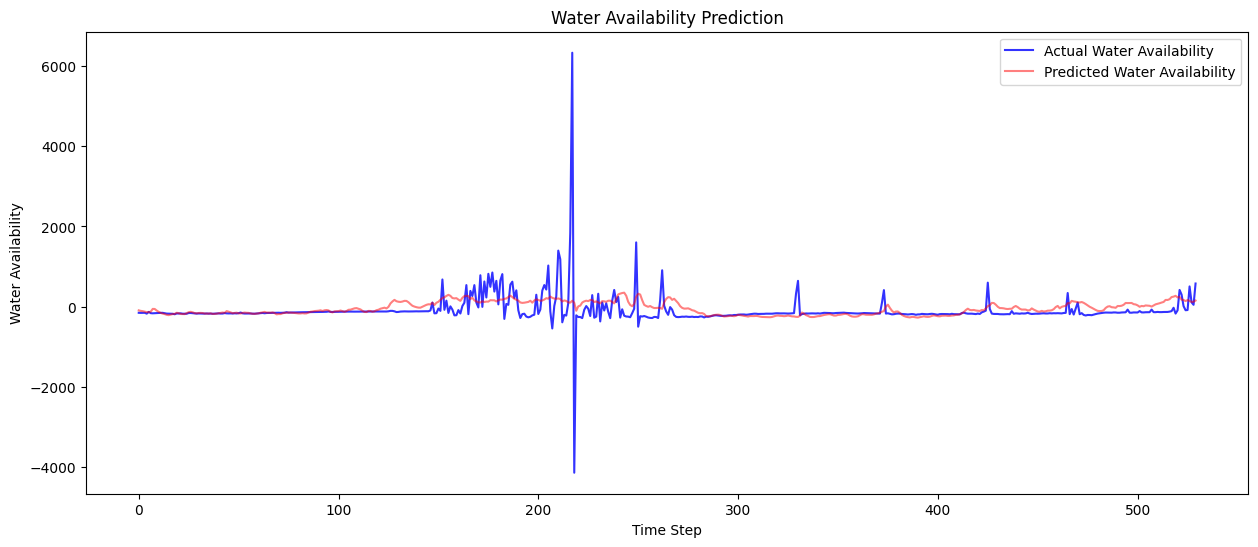

In [96]:
plt.figure(figsize=(15, 6))
plt.plot(inverse_transformed_y_test, label='Actual Water Availability', color='blue', alpha=0.8)  # Use inverse transformed data
plt.plot(inverse_transformed_test_predictions, label='Predicted Water Availability', color='red', alpha=0.5)
plt.title('Water Availability Prediction')
plt.xlabel('Time Step')
plt.ylabel('Water Availability')
plt.legend()
plt.show()

#### Metrics after inverse transform

In [97]:
mse = mean_squared_error(inverse_transformed_y_test, inverse_transformed_test_predictions)
rmse = root_mean_squared_error(inverse_transformed_y_test, inverse_transformed_test_predictions)
mae = mean_absolute_error(inverse_transformed_y_test, inverse_transformed_test_predictions)

print(f"mse: {mse:.4f}")
print(f"mae: {mae:.4f}")
print(f"rmse: {rmse:.4f}")

mse: 162536.5486
mae: 167.7565
rmse: 403.1582


These metrics after inverse transform tends to be higher than expected due to the fact that our data contains vivid highs and lows in water availability, which our current model fails to understand. 

However, the overall prediction done by the model is **pretty good** and can be used to approximate future water availability in bhopal.